In [1]:
import numpy
import plotly.figure_factory as ff
import plotly.graph_objects as go

from ipc_toolkit import *

In [2]:
import ipc_toolkit
# help(ipc_toolkit)

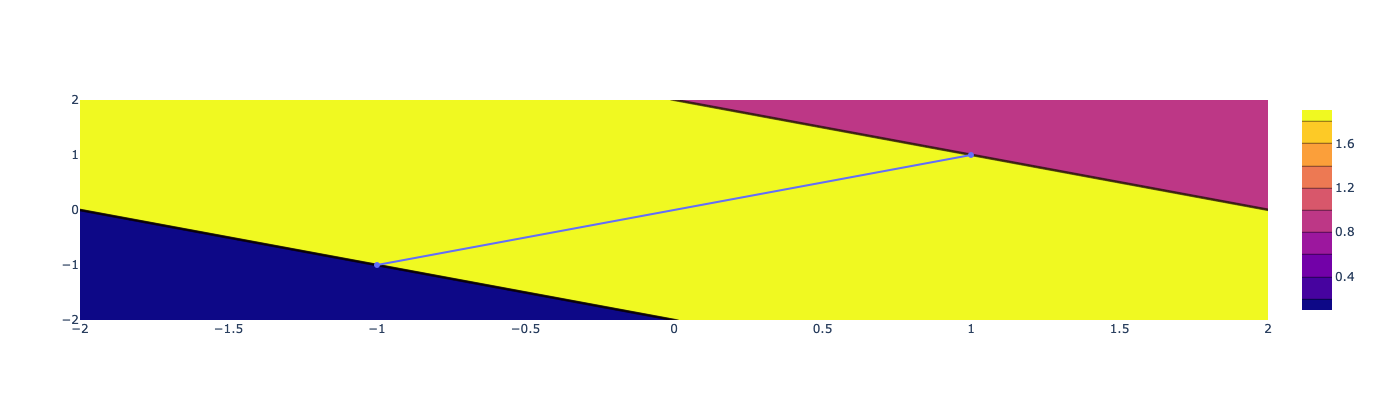

In [3]:
e0 = numpy.array([-1.0, -1.0])
e1 = numpy.array([1.0, 1.0])
xs = numpy.linspace(-2, 2, 100)
ys = numpy.linspace(-2, 2, 100)
dtypes = numpy.empty((xs.size, ys.size), dtype=int)
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        dtypes[j, i] = point_edge_distance_type(
            numpy.array([x, y]), e0, e1)
fig = go.Figure(data=[
    go.Scatter(x=[e0[0], e1[0]], y=[e0[1], e1[1]]),
    go.Contour(z=dtypes, x=xs, y=ys)
], layout=go.Layout(width=400, height=400))
fig.show()

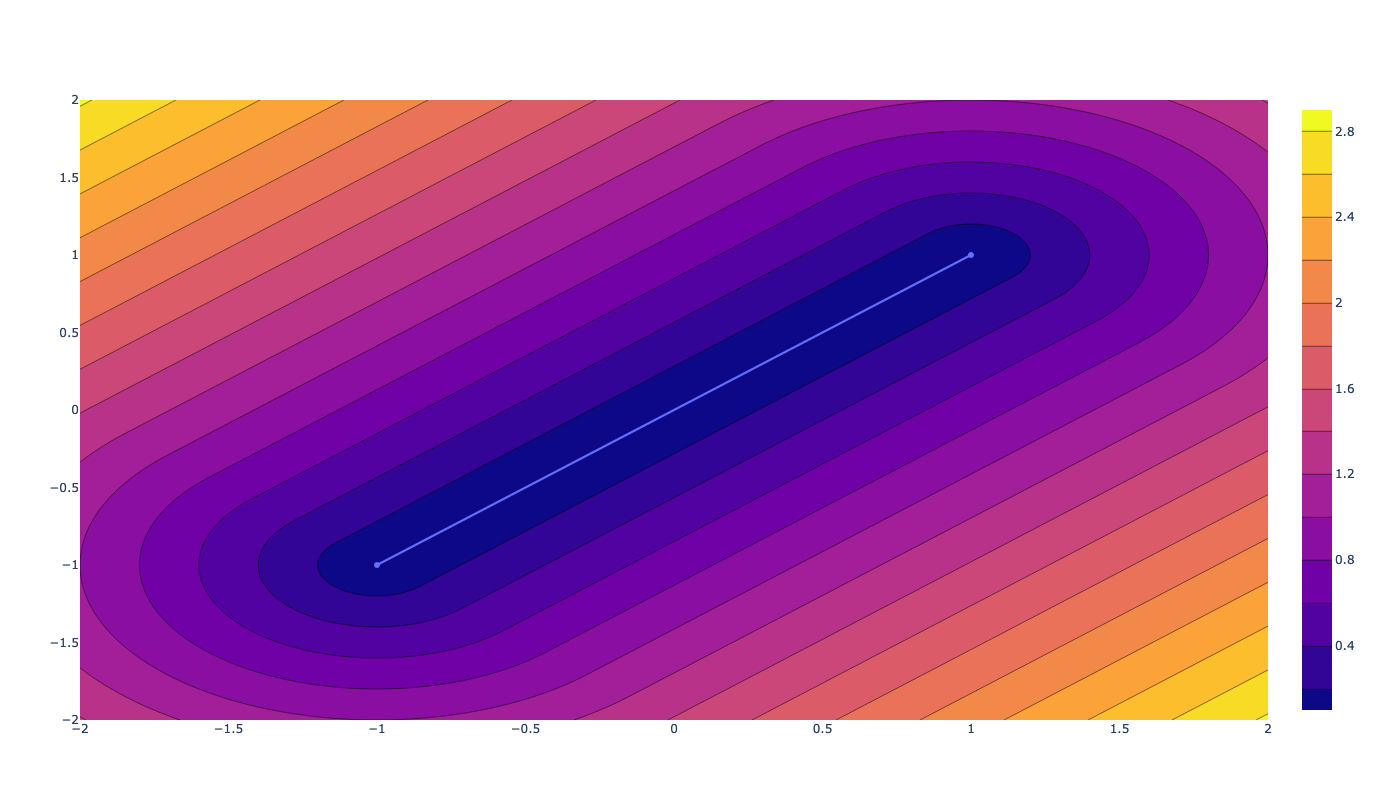

In [4]:
e0 = numpy.array([-1, -1], dtype=float)
e1 = numpy.array([1, 1], dtype=float)
xs = numpy.linspace(-2, 2, 100)
ys = numpy.linspace(-2, 2, 100)
distances = numpy.empty((xs.size, ys.size))
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        distances[j, i] = point_edge_distance(numpy.array([x, y]), e0, e1)
fig = go.Figure(data=[
    go.Scatter(x=[e0[0], e1[0]], y=[e0[1], e1[1]]),
    go.Contour(z=numpy.sqrt(distances), x=xs, y=ys)
], layout=go.Layout(width=800, height=800))
fig.show()

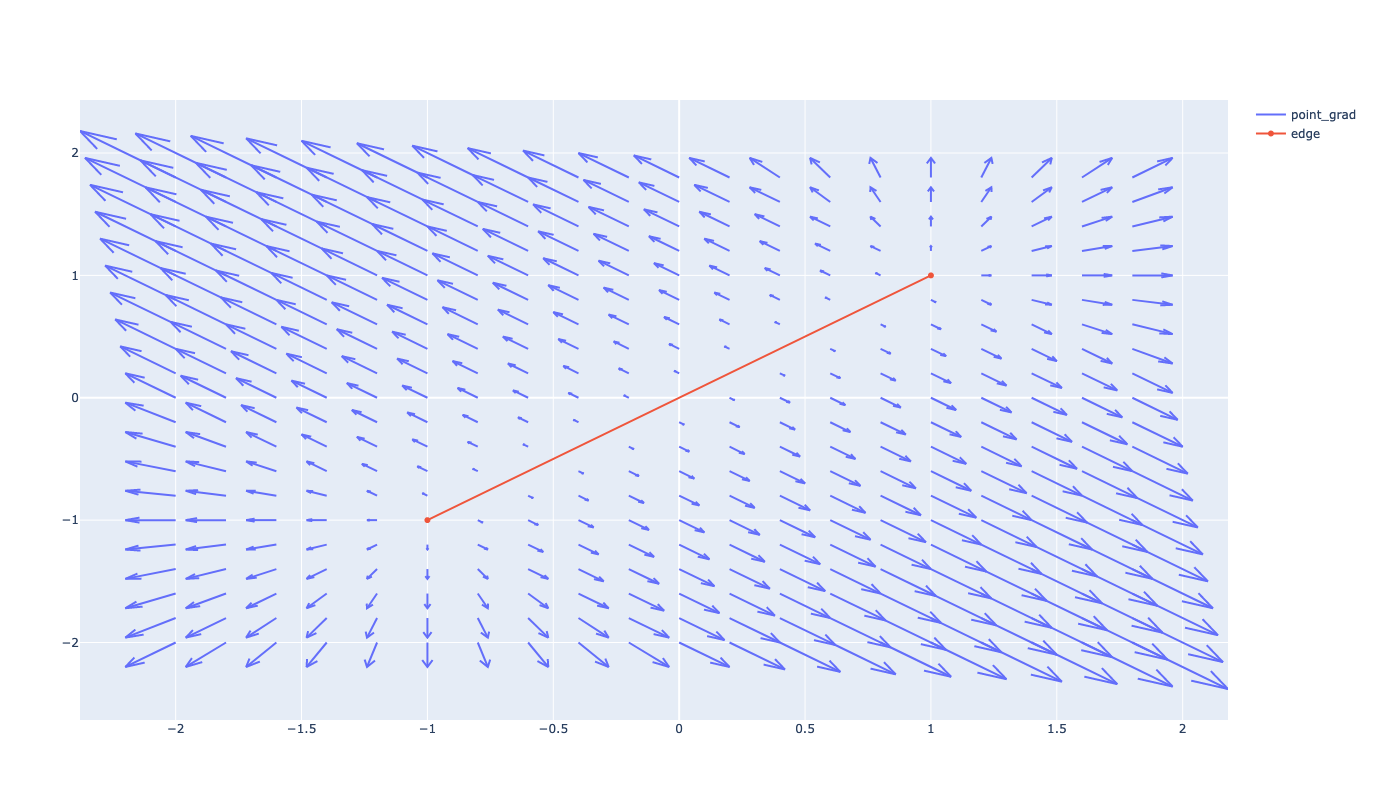

<ipython-input-5-6e9810e5f2d5>:19: RuntimeWarning:

invalid value encountered in true_divide



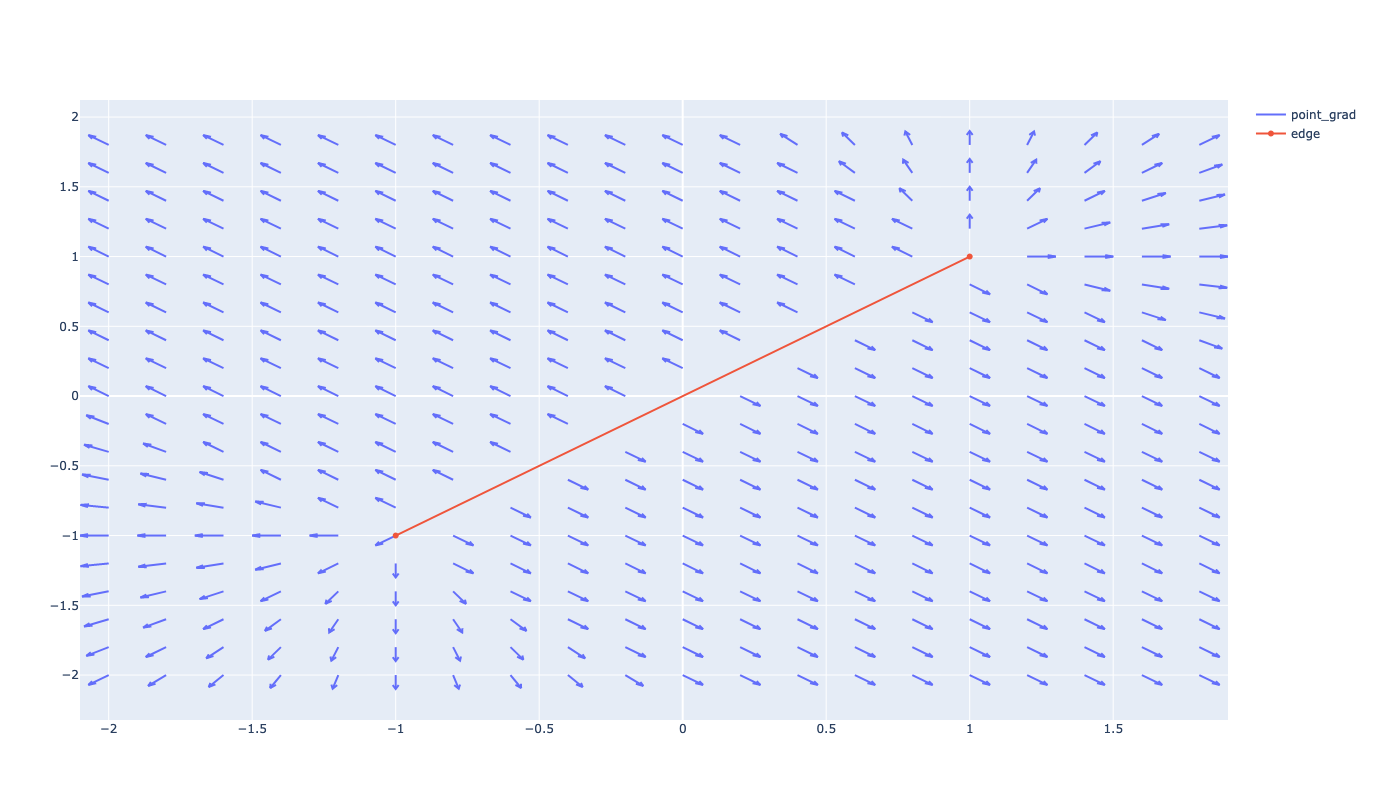

In [5]:
e0 = numpy.array([-1, -1], dtype=float)
e1 = numpy.array([1, 1], dtype=float)
x, y = numpy.meshgrid(numpy.arange(-2, 2, .2), numpy.arange(-2, 2, .2))
u, v = numpy.empty(x.shape), numpy.empty(x.shape)
d = numpy.empty(x.shape)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        grad = point_edge_distance_gradient(
            numpy.array([x[i, j], y[i, j]]), e0, e1)
        u[i, j] = grad[0]
        v[i, j] = grad[1]
        d[i, j] = numpy.sqrt(point_edge_distance(
            numpy.array([x[i, j], y[i, j]]), e0, e1))

fig = ff.create_quiver(x, y, u, v, name="point_grad")
fig.add_trace(go.Scatter(x=[e0[0], e1[0]], y=[e0[1], e1[1]], name="edge"))
fig.update_layout(width=800, height=800)
fig.show()
fig = ff.create_quiver(x, y, u/(2 * d), v / (2 * d), name="point_grad")
fig.add_trace(go.Scatter(x=[e0[0], e1[0]], y=[e0[1], e1[1]], name="edge"))
fig.update_layout(width=800, height=800)
fig.show()

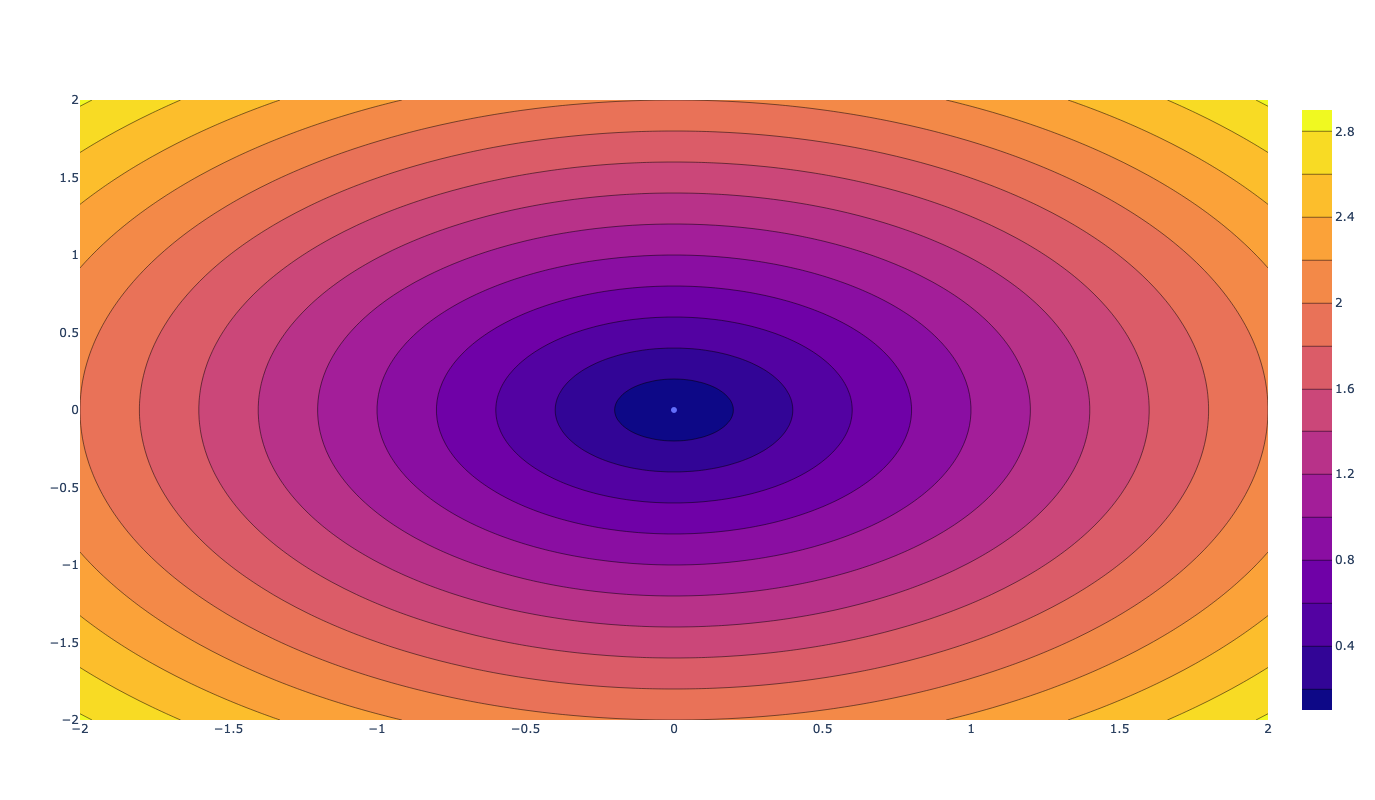

In [6]:
p = numpy.array([0, 0], dtype=float)
xs = numpy.linspace(-2, 2, 100)
ys = numpy.linspace(-2, 2, 100)
distances = numpy.empty((xs.size, ys.size))
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        distances[j, i] = point_point_distance(numpy.array([x, y]), p)
fig = go.Figure(data=[
    go.Scatter(x=[p[0]], y=[p[1]]),
    go.Contour(z=numpy.sqrt(distances), x=xs, y=ys)
], layout=go.Layout(width=800, height=800))
fig.show()

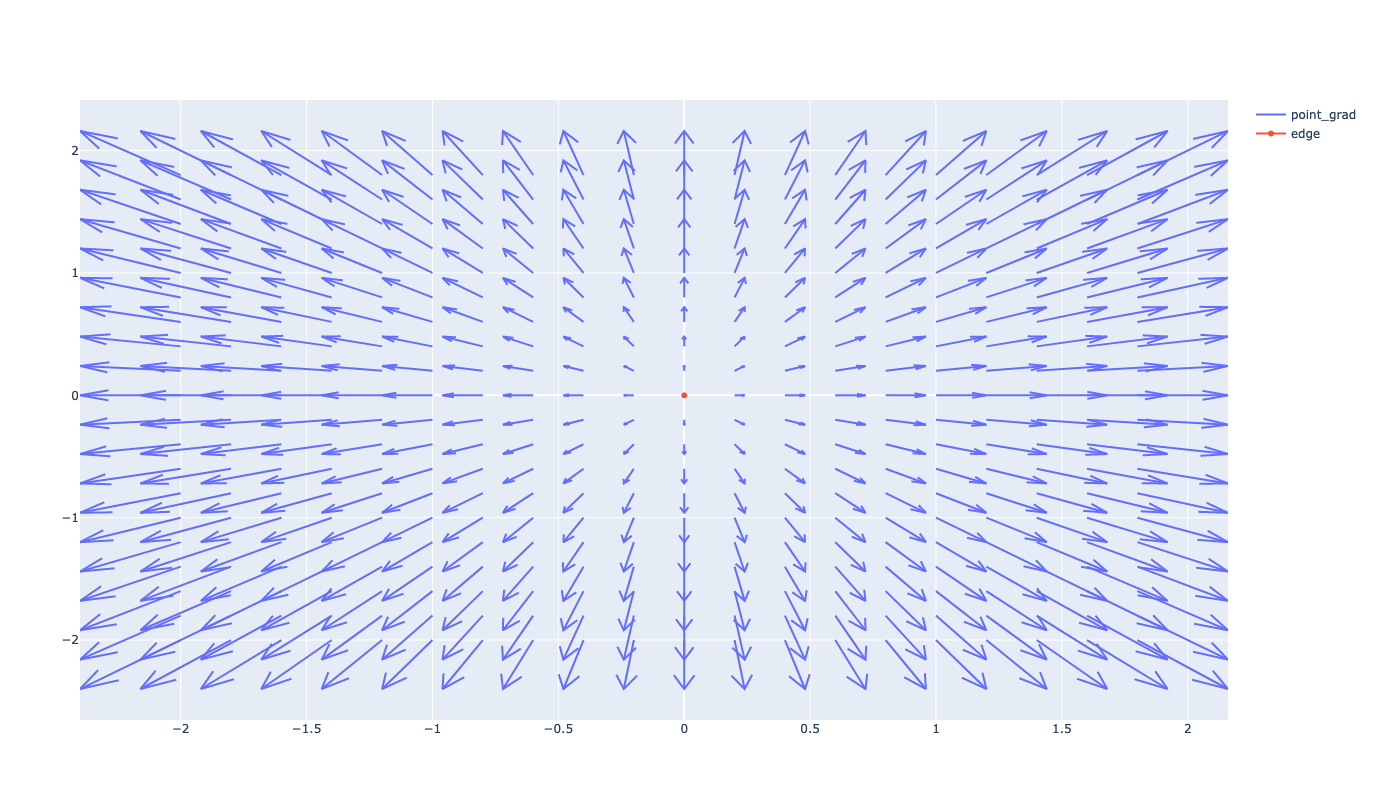

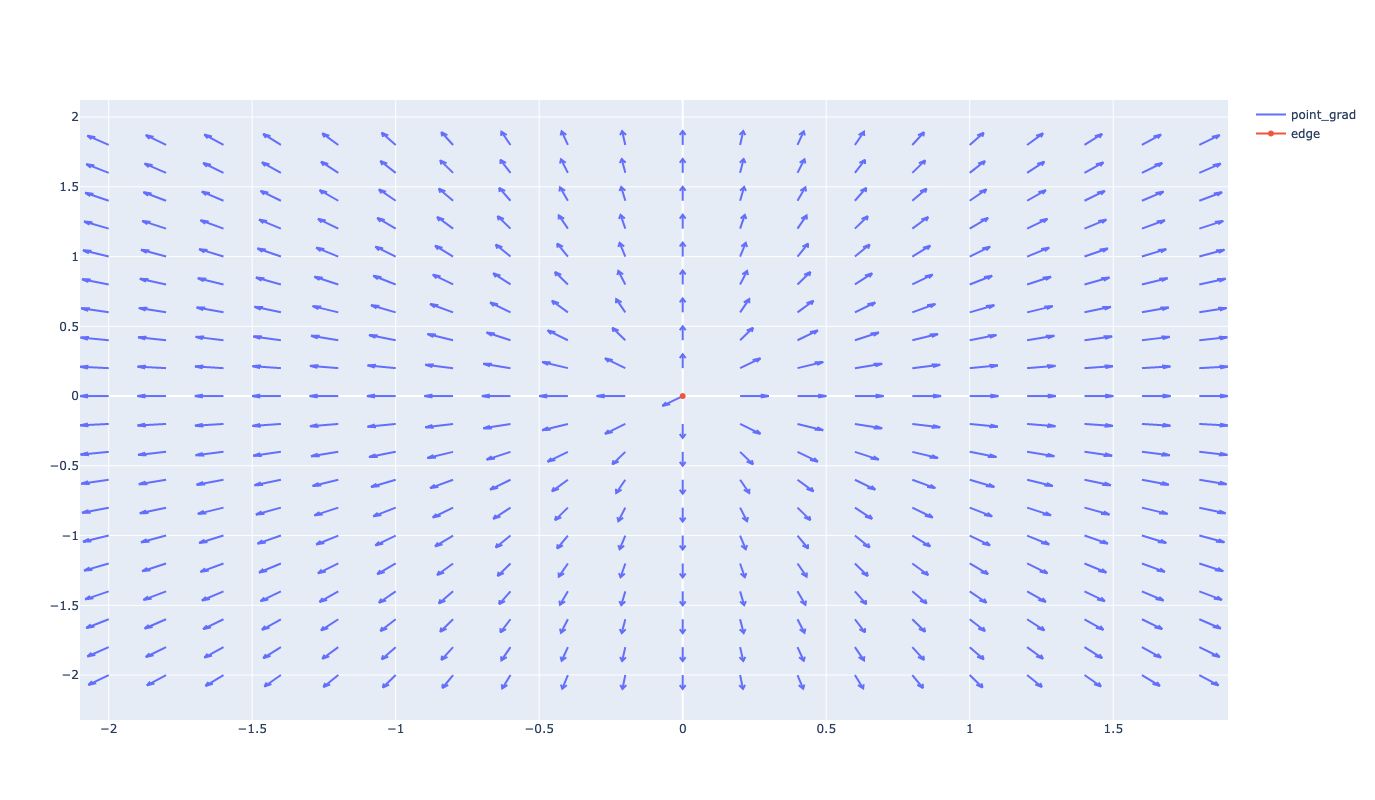

In [7]:
p = numpy.array([0, 0], dtype=float)
x, y = numpy.meshgrid(numpy.arange(-2, 2, .2), numpy.arange(-2, 2, .2))
u, v = numpy.empty(x.shape), numpy.empty(x.shape)
d = numpy.empty(x.shape)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        grad = point_point_distance_gradient(
            numpy.array([x[i, j], y[i, j]]), p)
        u[i, j] = grad[0]
        v[i, j] = grad[1]
        d[j, i] = numpy.sqrt(point_point_distance(
            numpy.array([x[i, j], y[i, j]]), p))

fig = ff.create_quiver(x, y, u, v, name="point_grad")
fig.add_trace(go.Scatter(x=[p[0]], y=[p[1]], name="edge"))
fig.update_layout(width=800, height=800)
fig.show()
fig = ff.create_quiver(x, y, u/(2 * d), v / (2 * d), name="point_grad")
fig.add_trace(go.Scatter(x=[p[0]], y=[p[1]], name="edge"))
fig.update_layout(width=800, height=800)
fig.show()

In [8]:
ea0 = numpy.random.random(3)
ea1 = numpy.random.random(3)
eb0 = numpy.random.random(3)
eb1 = numpy.random.random(3)

print(edge_edge_distance(ea0, ea1, eb0, eb1))
print(edge_edge_distance_gradient(ea0, ea1, eb0, eb1))
print(edge_edge_distance_hessian(ea0, ea1, eb0, eb1))

0.04657394163259487
[-0.06777753  0.39053675  0.17083039  0.          0.          0.
  0.04342273 -0.25020347 -0.10944516  0.0243548  -0.14033328 -0.06138523]
[[ 1.29595403 -0.48273227  0.82424557  0.          0.          0.
  -0.87114301  0.54476343 -0.42505517 -0.42481102 -0.06203115 -0.39919041]
 [-0.48273227  1.66901245  0.56514767  0.          0.          0.
   0.2812474  -0.90781176 -0.29144098  0.20148487 -0.76120069 -0.27370669]
 [ 0.82424557  0.56514767  1.03503352  0.          0.          0.
  -0.48021841 -0.63776921 -0.78370772 -0.34402716  0.07262154 -0.25132579]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.     

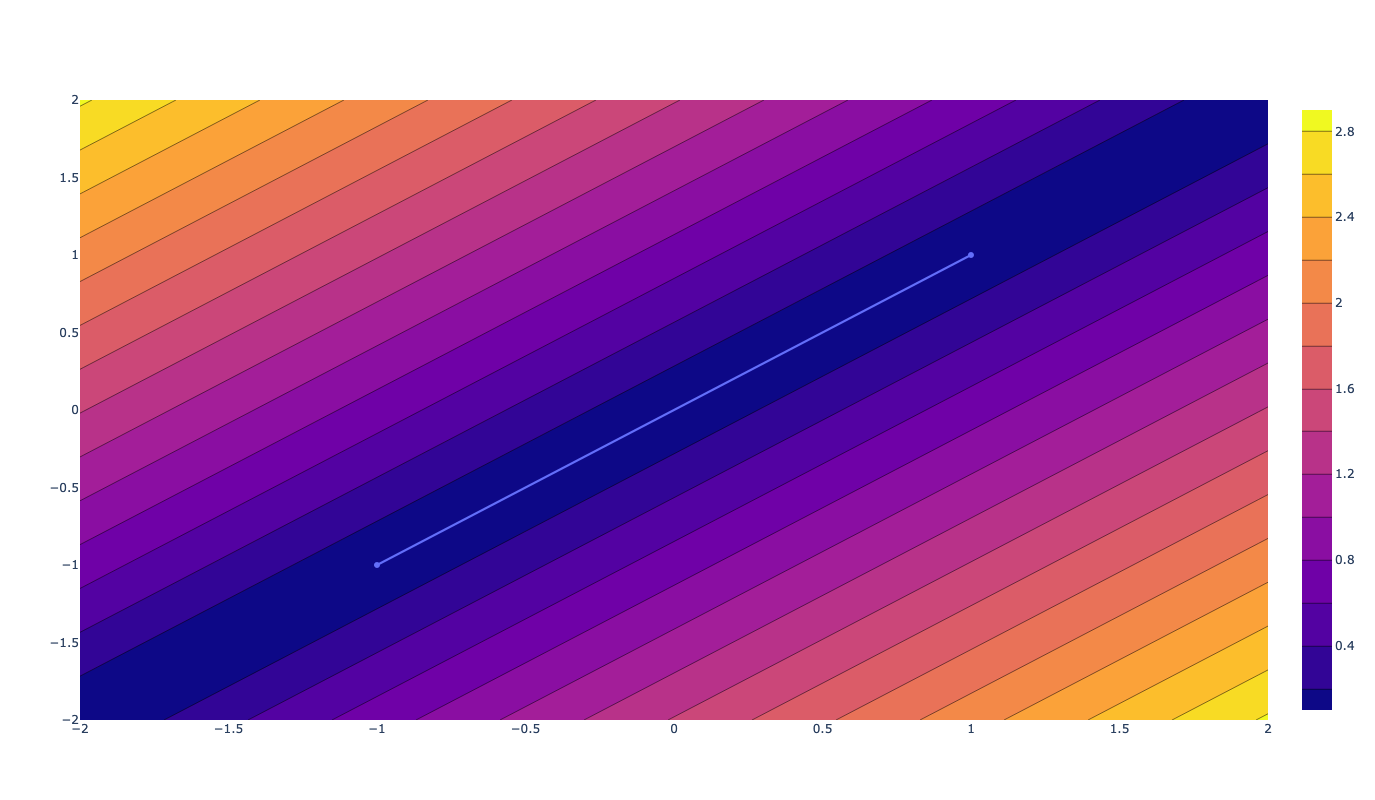

In [9]:
e0 = numpy.array([-1, -1], dtype=float)
e1 = numpy.array([1, 1], dtype=float)
xs = numpy.linspace(-2, 2, 100)
ys = numpy.linspace(-2, 2, 100)
distances = numpy.empty((xs.size, ys.size))
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        distances[j, i] = point_line_distance(numpy.array([x, y]), e0, e1)
fig = go.Figure(data=[
    go.Scatter(x=[e0[0], e1[0]], y=[e0[1], e1[1]]),
    go.Contour(z=numpy.sqrt(distances), x=xs, y=ys)
], layout=go.Layout(width=800, height=800))
fig.show()

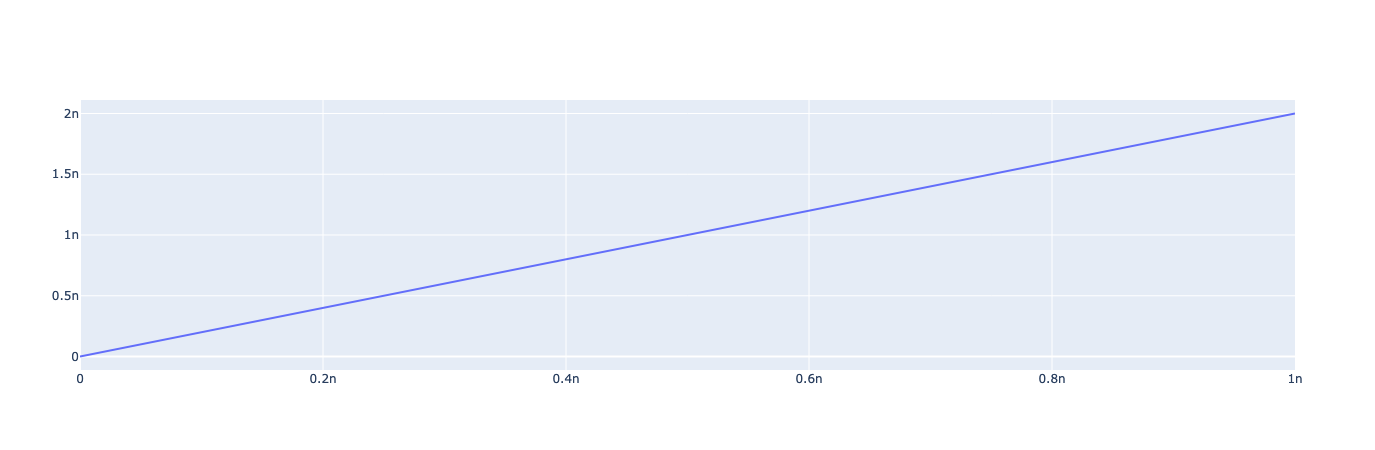

In [10]:
x = numpy.linspace(0, 1e-9)
y = numpy.asarray(list(map(lambda x: edge_edge_mollifier(x, eps_x=1), x)))
fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.show()

In [11]:
help(barrier)

Help on built-in function barrier in module ipc_toolkit:

barrier(...) method of builtins.PyCapsule instance
    barrier(d: float, dhat: float) -> float
    
    
    Function that grows to infinity as d approaches 0 from the right.
    
    Parameters
    ----------
    d : The distance
    dhat : Activation distance of the barrier
    
    Returns
    -------
    The value of the barrier function at d.
    
    See also
    --------
    
    Notes
    -----
    .. math:: b(d) = -(d-\hat{d})^2\ln(\frac{d}{\hat{d}})
    
    Examples
    --------

